<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 100, 16)           8000      
_________________________________________________________________
lstm_33 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 17s 45ms/step - loss: 0.6927 - accuracy: 0.5190 - val_loss: 0.6923 - val_accuracy: 0.5350
Epoch 2/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6908 - accuracy: 0.5924 - val_loss: 0.6897 - val_accuracy: 0.6022
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6858 - accur

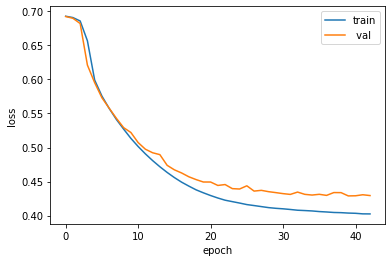

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6925 - accuracy: 0.5427 - val_loss: 0.6918 - val_accuracy: 0.5876
Epoch 2/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6908 - accuracy: 0.5949 - val_loss: 0.6896 - val_accuracy: 0.6210
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6874 - accuracy: 0.6225 - val_loss: 0.6845 - val_accuracy: 0.6414
Epoch 4/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6778 - accuracy: 0.6601 - val_loss: 0.6675 - val_accuracy: 0.6702
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6367 - accuracy: 0.6952 - val_loss: 0.6062 - val_accuracy: 0.7030
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5918 - accuracy: 0.7106 - val_loss: 0.5787 - val_accuracy: 0.7278
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5672 - accuracy: 0.7340 - val_loss: 0.5560 - val_ac

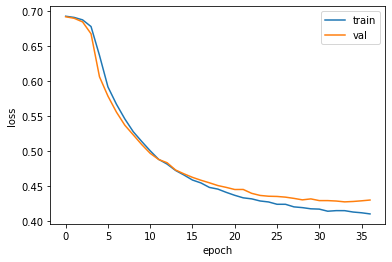

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 100, 16)           8000      
_________________________________________________________________
lstm_35 (LSTM)               (None, 100, 8)            800       
_________________________________________________________________
lstm_36 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 33s 93ms/step - loss: 0.6918 - accuracy: 0.5546 - val_loss: 0.6902 - val_accuracy: 0.5968
Epoch 2/100
313/313 [==============================] - 28s 90ms/step - loss: 0.6832 - accuracy: 0.6327 -

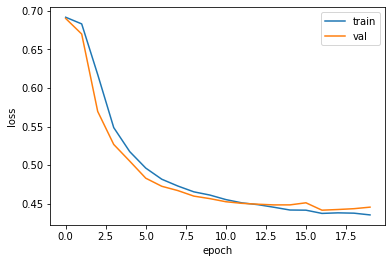

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 100, 16)           8000      
_________________________________________________________________
gru_3 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 18s 50ms/step - loss: 0.6929 - accuracy: 0.5180 - val_loss: 0.6926 - val_accuracy: 0.5440
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6916 - accuracy: 0.5705 - val_loss: 0.6913 - val_accuracy: 0.5642
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6896 - accur

[0.4421118497848511, 0.7932800054550171]

In [16]:
#LSTM 신경망 훈련하기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', ' val'])
plt.show()

#순환층에 드롭아웃 적용하기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#2개의 층을 연결하기
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#GRU 신경망 훈련하기
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target,epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

#마무리
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)